In [ ]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [ ]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [ ]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [ ]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

In [ ]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 86.4132
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.6789
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5308
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0598
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8056
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1666
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1877
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7600
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3631
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6717


In [ ]:
normalize = layers.Normalization()

In [ ]:
normalize.adapt(abalone_features)

In [ ]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 101.1466
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.4418
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.4731
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4556
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8772
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6526
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8009
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2057
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9638
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8707


In [ ]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [ ]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor shape=(None,), dtype=float32, sparse=False, ragged=False, name=keras_tensor_9>

In [ ]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [ ]:
print(calc(np.array([1])).numpy())
print(calc(np.array([2])).numpy())

[3.]
[5.]


In [ ]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=sex>,
 'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=age>,
 'n_siblings_spouses': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=n_siblings_spouses>,
 'parch': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=parch>,
 'fare': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=fare>,
 'class': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=class>,
 'deck': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=deck>,
 'embark_town': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=embark_town>,
 'alone': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=alone>}

In [ ]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, ragged=False, name=keras_tensor_11>

In [ ]:
preprocessed_inputs = [all_numeric_inputs]

In [ ]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

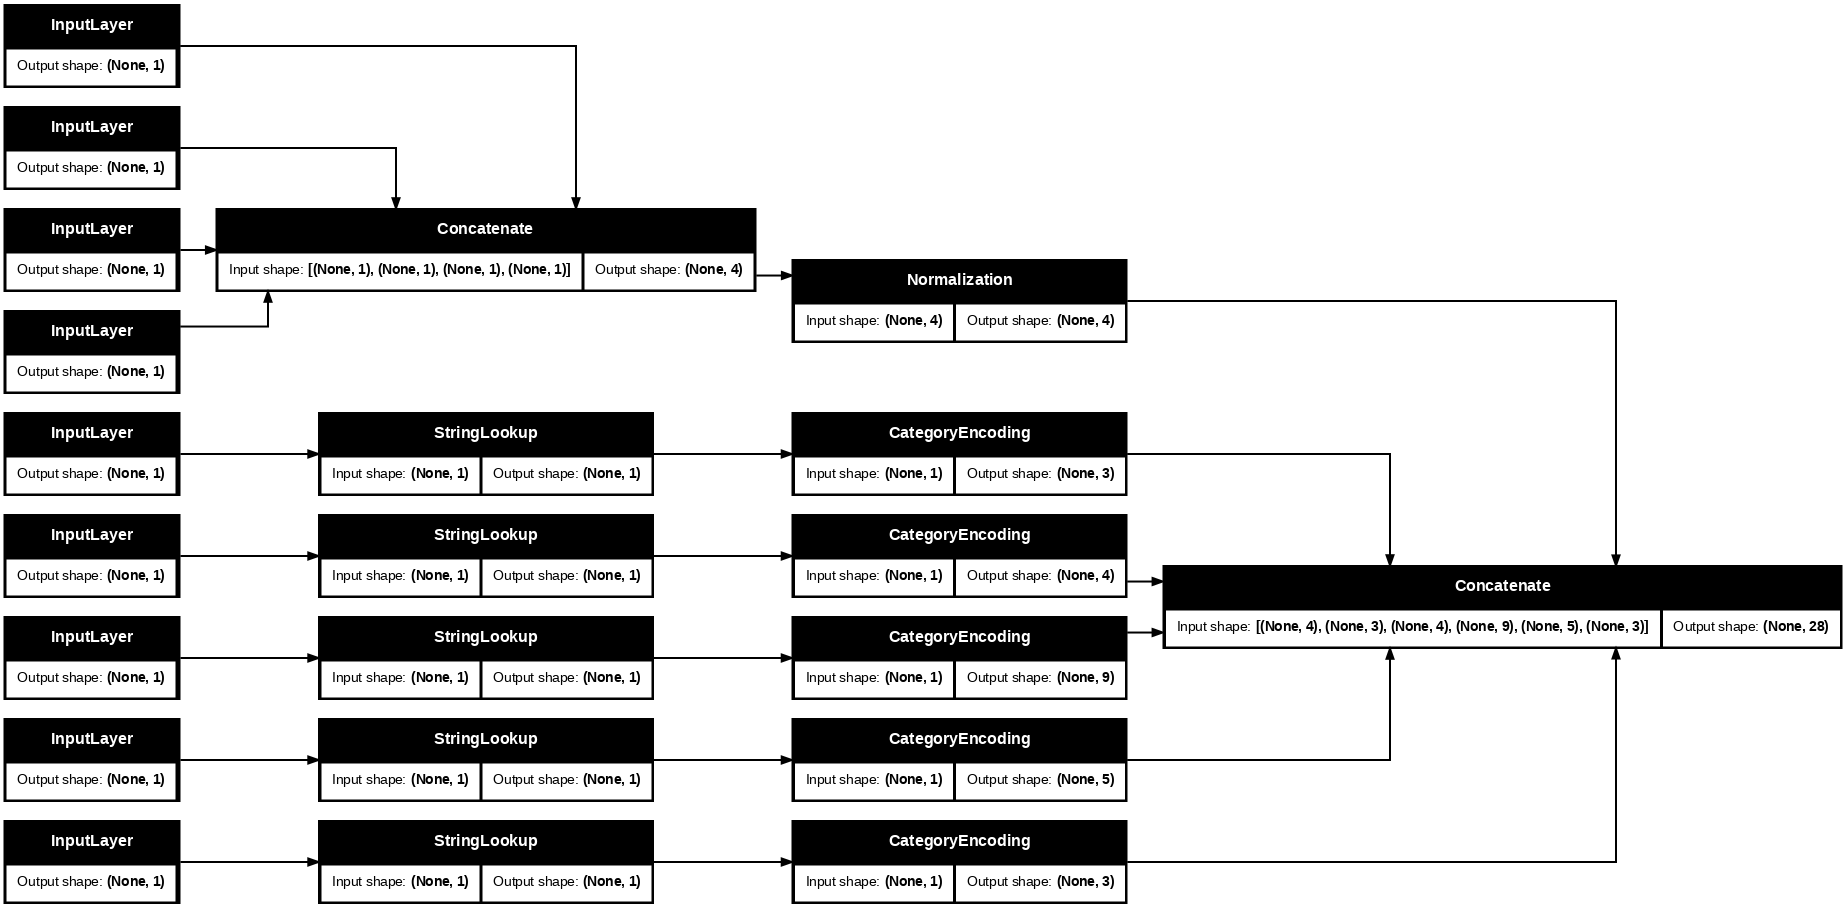

In [ ]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [ ]:
titanic_features_dict = {name: np.array(value)
                         for name, value in titanic_features.items()}

In [ ]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [ ]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [ ]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7473
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6061
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5395
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4681
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4849
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4472  
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4083 
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4472 
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4351 
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4006 


In [ ]:
titanic_model.save('test.keras')
reloaded = tf.keras.models.load_model('test.keras')

In [ ]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.782]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.782]], shape=(1, 1), dtype=float32)


In [ ]:
import itertools

def slices(features):
  for i in itertools.count():
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example

In [ ]:
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [ ]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

In [ ]:
for example in features_ds:
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [ ]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [ ]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

In [ ]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4091
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4258
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4235
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4218
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4245 


In [ ]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

30874/30874 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


In [ ]:
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

sex                 : [b'male' b'female' b'male' b'male' b'female']
age                 : [28. 22. 26. 44. 30.]
n_siblings_spouses  : [0 0 0 1 1]
parch               : [0 0 0 0 1]
fare                : [ 0.    10.517 18.788 26.    24.15 ]
class               : [b'Second' b'Third' b'Third' b'Second' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Cherbourg' b'Southampton' b'Southampton']
alone               : [b'y' b'y' b'y' b'n' b'n']

label               : [0 0 1 0 0]


In [ ]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz',
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

 180224/Unknown 0s 1us/step

In [ ]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value[:5]}")
  print()
  print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [282.76 292.83 285.67 285.7  285.5 ]
rain_1h             : [0.   0.   0.29 0.25 0.  ]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [90  1 92 92 90]
weather_main        : [b'Rain' b'Clear' b'Mist' b'Rain' b'Mist']
weather_description : [b'light rain' b'sky is clear' b'mist' b'light rain' b'mist']
date_time           : [b'2013-05-23 12:00:00' b'2013-10-09 11:00:00' b'2013-06-06 09:00:00'
 b'2013-06-06 01:00:00' b'2012-10-24 07:00:00']

label               : [5227 4919 5050  372 5722]


In [ ]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 22.4 s, sys: 3.4 s, total: 25.8 s
Wall time: 20.6 s


In [ ]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 2.55 s, sys: 256 ms, total: 2.8 s
Wall time: 2.33 s


In [ ]:
%%time
snapshot = tf.data.experimental.snapshot('titanic.tfsnap')
snapshotting = traffic_volume_csv_gz_ds.apply(snapshot).shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: user 2.52 s, sys: 156 ms, total: 2.67 s
Wall time: 1.95 s


In [ ]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

159105024/Unknown 2s 0us/step

In [ ]:
import pathlib

# Chercher RÉCURSIVEMENT les fichiers CSV dans tous les sous-dossiers de 'fonts'
font_csvs = sorted(str(p) for p in pathlib.Path('fonts').rglob("*.csv"))

print(f"Nombre de fichiers CSV trouvés: {len(font_csvs)}")

if font_csvs:
    print("10 premiers fichiers CSV:")
    for i, csv_file in enumerate(font_csvs[:10]):
        print(f"  {i+1}. {csv_file}")
else:
    print("Aucun fichier CSV trouvé. Exploration de la structure:")
    for item in pathlib.Path('fonts').rglob('*'):
        if item.is_file():
            print(f"  {item}")

Nombre de fichiers CSV trouvés: 153
10 premiers fichiers CSV:
  1. fonts/fonts_extracted/AGENCY.csv
  2. fonts/fonts_extracted/ARIAL.csv
  3. fonts/fonts_extracted/BAITI.csv
  4. fonts/fonts_extracted/BANKGOTHIC.csv
  5. fonts/fonts_extracted/BASKERVILLE.csv
  6. fonts/fonts_extracted/BAUHAUS.csv
  7. fonts/fonts_extracted/BELL.csv
  8. fonts/fonts_extracted/BERLIN.csv
  9. fonts/fonts_extracted/BERNARD.csv
  10. fonts/fonts_extracted/BITSTREAMVERA.csv


In [ ]:
len(font_csvs)

153

In [ ]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern="fonts/fonts_extracted/*.csv",  # <-- chemin corrigé
    batch_size=10,
    num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000
)

In [ ]:
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i>15:
      break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'MONEY' b'CITYBLUEPRINT' b'SCRIPT' b'FRENCH' b'BLACKADDER' b'CALIBRI'
 b'SWIS721' b'CENTAUR' b'PAPYRUS' b'COURIER']
fontVariant         : [b'scanned' b'CITYBLUEPRINT' b'SCRIPTS' b'FRENCH SCRIPT MT'
 b'BLACKADDER ITC' b'CALIBRI LIGHT' b'SWIS721 LTEX BT' b'CENTAUR'
 b'PAPYRUS' b'scanned']
m_label             : [   55   180  1097   219   122 43830   217    92   199   116]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 0 1 1 1 0 1 0 0 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [ 0 44 67 20 60 53 21 28 37  0]
m_left              : [ 0 33 23 34 19 24 31 22 24  0]
originalH           : [23 12 32 57 22 46 64 59 76 14]
originalW           : [13 13 54 48 35 27 53 32 61 11]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [255   1   1   1   1   1   1 150   1   1]
r0c1                : [255   1   1   1   1   1   1 245

In [ ]:
import re

def make_images(features):
  image = [None]*400
  new_feats = {}

  for name, value in features.items():
    match = re.match('r(\d+)c(\d+)', name)
    if match:
      image[int(match.group(1))*20+int(match.group(2))] = value
    else:
      new_feats[name] = value

  image = tf.stack(image, axis=0)
  image = tf.reshape(image, [20, 20, -1])
  new_feats['image'] = image

  return new_feats

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2506390389.py:8: SyntaxWarning: invalid escape sequence '\d'
  match = re.match('r(\d+)c(\d+)', name)


In [ ]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
  break

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 42929 (\N{LATIN CAPITAL LETTER TURNED T}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 43460 (\N{JAVANESE PADA MADYA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 42929 (\N{LATIN CAPITAL LETTER TURNED T}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 43460 (\N{JAVANESE PADA MADYA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


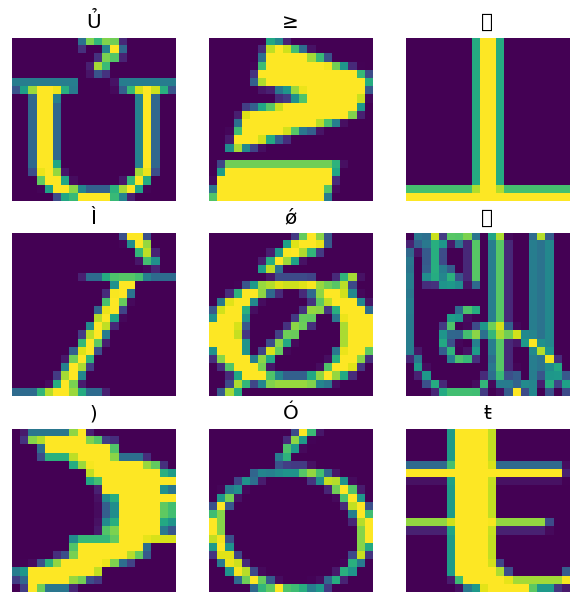

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
  plt.subplot(3,3,n+1)
  plt.imshow(features['image'][..., n])
  plt.title(chr(features['m_label'][n]))
  plt.axis('off')

In [ ]:
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()]*10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [ ]:
features = tf.io.decode_csv(lines, record_defaults=all_strings)

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [ ]:
print(lines[0])

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [ ]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [ ]:
features = tf.io.decode_csv(lines, record_defaults=titanic_types)

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: int32, shape: (627,)
type: string, shape: (627,)
type: float32, shape: (627,)
type: int32, shape: (627,)
type: int32, shape: (627,)
type: float32, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [ ]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)

for example in simple_titanic.take(1):
  print([e.numpy() for e in example])

[np.int32(0), b'male', np.float32(22.0), np.int32(1), np.int32(0), np.float32(7.25), b'Third', b'unknown', b'Southampton', b'n']


In [ ]:
def decode_titanic_line(line):
  return tf.io.decode_csv(line, titanic_types)

manual_titanic = (
    # Load the lines of text
    tf.data.TextLineDataset(titanic_file_path)
    # Skip the header row.
    .skip(1)
    # Decode the line.
    .map(decode_titanic_line)
)

for example in manual_titanic.take(1):
  print([e.numpy() for e in example])

[np.int32(0), b'male', np.float32(22.0), np.int32(1), np.int32(0), np.float32(7.25), b'Third', b'unknown', b'Southampton', b'n']


In [ ]:
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

In [ ]:
num_font_features = font_line.count(',')+1
font_column_types = [str(), str()] + [float()]*(num_font_features-2)

In [ ]:
font_csvs[0]

'fonts/fonts_extracted/AGENCY.csv'

In [ ]:
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs,
    record_defaults=font_column_types,
    header=True)

In [ ]:
for row in simple_font_ds.take(10):
  print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


In [ ]:
font_files = tf.data.Dataset.list_files("fonts/fonts_extracted/*.csv")

In [ ]:
print('Epoch 1:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')

Epoch 1:
     b'fonts/fonts_extracted/BERLIN.csv'
     b'fonts/fonts_extracted/ONYX.csv'
     b'fonts/fonts_extracted/GOTHICE.csv'
     b'fonts/fonts_extracted/BROADWAY.csv'
     b'fonts/fonts_extracted/SUPERFRENCH.csv'
    ...

Epoch 2:
     b'fonts/fonts_extracted/SYLFAEN.csv'
     b'fonts/fonts_extracted/VERDANA.csv'
     b'fonts/fonts_extracted/DUTCH801.csv'
     b'fonts/fonts_extracted/CREDITCARD.csv'
     b'fonts/fonts_extracted/GIGI.csv'
    ...


In [ ]:
def make_font_csv_ds(path):
  return tf.data.experimental.CsvDataset(
    path,
    record_defaults=font_column_types,
    header=True)

In [ ]:
font_rows = font_files.interleave(make_font_csv_ds,
                                  cycle_length=3)

In [ ]:
fonts_dict = {'font_name':[], 'character':[]}

for row in font_rows.take(10):
  fonts_dict['font_name'].append(row[0].numpy().decode())
  fonts_dict['character'].append(chr(int(row[2].numpy())))

pd.DataFrame(fonts_dict)

,font_name,character
0,PMINGLIU-EXTB,™
1,FOOTLIGHT,
2,CALIBRI,︣
3,PMINGLIU-EXTB,›
4,FOOTLIGHT,
5,CALIBRI,︢
6,PMINGLIU-EXTB,‹
7,FOOTLIGHT,◊
8,CALIBRI,︡
9,PMINGLIU-EXTB,‰


In [ ]:
BATCH_SIZE=2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/fonts_extracted/*.csv",
    batch_size=BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100)

In [ ]:
%%time
for i,batch in enumerate(fonts_ds.take(20)):
  print('.',end='')

print()

....................
CPU times: user 30.6 s, sys: 5.72 s, total: 36.3 s
Wall time: 25.2 s


In [ ]:
fonts_files = tf.data.Dataset.list_files("fonts/fonts_extracted/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1),
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

In [ ]:
%%time
for i,batch in enumerate(fonts_fast.take(20)):
  print('.',end='')

print()

....................
CPU times: user 4.24 s, sys: 62.3 ms, total: 4.3 s
Wall time: 4.51 s
